In [4]:
#important fucntion to load the dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
#downloading the dataset
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:11<00:00, 130MB/s]
100% 1.06G/1.06G [00:11<00:00, 97.0MB/s]


In [6]:
#unzipping the file
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
#importing important libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
#this is for the train_dataset
#always has to be used for the model building
train_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

#this is for the validation dataset

validation_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [9]:
#Normalize
#there is a need to normalize becaise we want to have the pixels value to
# be in the range of 0 and 1
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_dataset.map(process)
validation_ds=validation_dataset.map(process)

In [10]:
#creating a cnn model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

#flattning the model

model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(train_dataset,epochs=15,validation_data=validation_dataset)

Epoch 1/15
625/625 [==============================] - 85s 117ms/step - loss: 0.7663 - accuracy: 0.6377 - val_loss: 0.7347 - val_accuracy: 0.6720
Epoch 2/15
625/625 [==============================] - 74s 118ms/step - loss: 0.4990 - accuracy: 0.7554 - val_loss: 0.4385 - val_accuracy: 0.7944
Epoch 3/15
625/625 [==============================] - 75s 120ms/step - loss: 0.4183 - accuracy: 0.8077 - val_loss: 0.3489 - val_accuracy: 0.8443
Epoch 4/15
625/625 [==============================] - 72s 114ms/step - loss: 0.3436 - accuracy: 0.8482 - val_loss: 0.4375 - val_accuracy: 0.8061
Epoch 5/15
625/625 [==============================] - 77s 123ms/step - loss: 0.2567 - accuracy: 0.8918 - val_loss: 0.2936 - val_accuracy: 0.8777
Epoch 6/15
625/625 [==============================] - 73s 116ms/step - loss: 0.1837 - accuracy: 0.9276 - val_loss: 0.2103 - val_accuracy: 0.9275
Epoch 7/15
625/625 [==============================] - 75s 119ms/step - loss: 0.1236 - accuracy: 0.9529 - val_loss: 0.1321 - val_ac

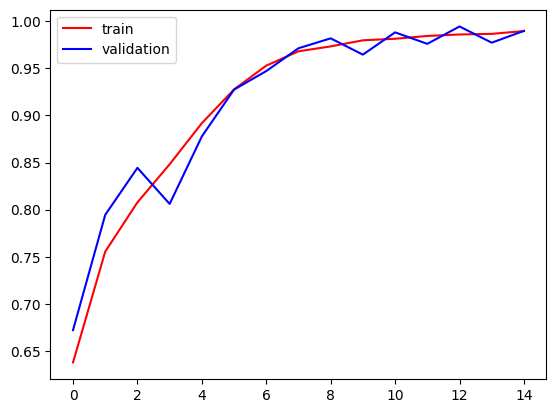

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],color='red',label='train')
plt.plot(history.history["val_accuracy"],color='blue',label='validation')
plt.legend()
plt.show()

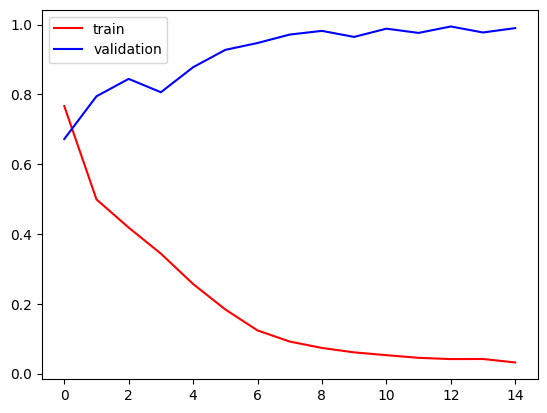

In [15]:
plt.plot(history.history["loss"],color='red',label='train')
plt.plot(history.history["val_accuracy"],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
import cv2
test_img=cv2.imread("/content/cat.jpeg")

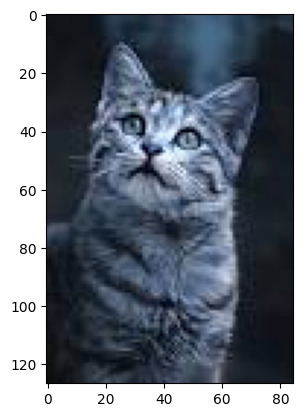

In [17]:
plt.imshow(test_img)

In [19]:
test_img.shape

(127, 85, 3)

In [20]:
test_img=cv2.resize(test_img,(256,256))

In [22]:
test_input=test_img.reshape((1,256,256,3))

In [24]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[3.8678368e-07]], dtype=float32)